## FMA initial dataset exploration

#### Examine track metadata, features, genres

In [1]:
%matplotlib inline

import os
import pandas as pd
import numpy as np

import IPython.display as ipd
import pydot
import seaborn as sns
import matplotlib.pyplot as plt

import utils

#### Load features, tracks, and genres

In [2]:
(features, tracks) = utils.load_features()
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Columns: 518 entries, ('chroma_cens', 'kurtosis', '01') to ('zcr', 'std', '01')
dtypes: float64(518)
memory usage: 422.0 MB


In [3]:
tracks.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   (album, comments)            106574 non-null  int64  
 1   (album, date_created)        103045 non-null  object 
 2   (album, date_released)       70294 non-null   object 
 3   (album, engineer)            15295 non-null   object 
 4   (album, favorites)           106574 non-null  int64  
 5   (album, id)                  106574 non-null  int64  
 6   (album, information)         83149 non-null   object 
 7   (album, listens)             106574 non-null  int64  
 8   (album, producer)            18060 non-null   object 
 9   (album, tags)                106574 non-null  object 
 10  (album, title)               105549 non-null  object 
 11  (album, tracks)              106574 non-null  int64  
 12  (album, type)                100066 non-null  object 
 13 

In [4]:
features.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106574 entries, 2 to 155320
Data columns (total 518 columns):
 #    Column                              Dtype  
---   ------                              -----  
 0    (chroma_cens, kurtosis, 01)         float64
 1    (chroma_cens, kurtosis, 02)         float64
 2    (chroma_cens, kurtosis, 03)         float64
 3    (chroma_cens, kurtosis, 04)         float64
 4    (chroma_cens, kurtosis, 05)         float64
 5    (chroma_cens, kurtosis, 06)         float64
 6    (chroma_cens, kurtosis, 07)         float64
 7    (chroma_cens, kurtosis, 08)         float64
 8    (chroma_cens, kurtosis, 09)         float64
 9    (chroma_cens, kurtosis, 10)         float64
 10   (chroma_cens, kurtosis, 11)         float64
 11   (chroma_cens, kurtosis, 12)         float64
 12   (chroma_cens, max, 01)              float64
 13   (chroma_cens, max, 02)              float64
 14   (chroma_cens, max, 03)              float64
 15   (chroma_cens, max, 04)          

In [5]:
genres =  utils.load_genres()
genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 1 to 1235
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #tracks    163 non-null    int64 
 1   parent     163 non-null    int64 
 2   title      163 non-null    object
 3   top_level  163 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


#### Explore predefined subsets

In [6]:
print('subsets', tracks[('set','subset')].unique())
df_small = tracks[tracks[('set','subset')] == 'small']
print('small', df_small.shape)
df_med = tracks[tracks[('set','subset')] == 'medium']
print('medium', df_med.shape)
df_large = tracks[tracks[('set','subset')] == 'large']
print('large', df_large.shape)

subsets ['small' 'medium' 'large']
small (8000, 52)
medium (17000, 52)
large (81574, 52)


#### Explore genres of subsets

* small is balanced, all with single genre_top
* medium is unbalanced, all with single genre_top
* large is unbalanced, and has a lot of tracks without genre_top

In [7]:
print(df_small[('track','genre_top')].value_counts())
print(df_med[('track','genre_top')].value_counts())
print(df_large[('track','genre_top')].value_counts())


Pop              1000
Experimental     1000
Rock             1000
Electronic       1000
Instrumental     1000
Hip-Hop          1000
International    1000
Folk             1000
Name: (track, genre_top), dtype: int64
Rock                   6103
Electronic             5314
Experimental           1251
Hip-Hop                1201
Classical               619
Folk                    519
Old-Time / Historic     510
Jazz                    384
Instrumental            350
Pop                     186
Country                 178
Soul-RnB                154
Spoken                  118
Blues                    74
Easy Listening           21
International            18
Name: (track, genre_top), dtype: int64
Experimental           8357
Rock                   7079
Electronic             3058
Hip-Hop                1351
Folk                   1284
Pop                    1146
Instrumental            729
Classical               611
International           371
Spoken                  305
Jazz              

#### Explore track metadata

sample the most popular tracks - it appears these are relatively unknown artists

In [8]:
tracks.sort_values(('track', 'favorites'),ascending=False)[[('artist', 'name'),('track','listens')]].head(5)

artist   track
                     name listens
track_id                         
42377      Broke For Free  543252
50582      Broke For Free  169675
62460             Jahzzar  356588
69170               Tours  335215
59541     Chris Zabriskie  167315

sample some track genres - we see multiple genres. 

* genres_all is all associated genres
* genres is genres_all, collapsing child genres into their top-level genre

In [9]:
tracks[[('track','genre_top'),('track','genres'),('track','genres_all')]].head(5)

track                              
         genre_top     genres         genres_all
track_id                                        
2          Hip-Hop       [21]               [21]
3          Hip-Hop       [21]               [21]
5          Hip-Hop       [21]               [21]
10             Pop       [10]               [10]
20             NaN  [76, 103]  [17, 10, 76, 103]

examine tracks associated with the most genres - we have tracks with > 10
associated genres. this seems suboptimal.

In [10]:
sorted = tracks.sort_values(by=('track','genres'), key=lambda x: x.str.count(','), ascending=False)
sorted[[('track','genre_top'),('track','genres'),('track','genres_all')]].head(5)

track                                                     \
         genre_top                                             genres   
track_id                                                                
110576         NaN  [1, 18, 22, 30, 32, 38, 41, 47, 49, 58, 74, 94...   
35032          NaN  [2, 15, 22, 26, 27, 30, 32, 38, 41, 42, 66, 83...   
35033          NaN  [2, 15, 22, 26, 27, 30, 32, 38, 41, 42, 66, 83...   
35150          NaN  [2, 15, 22, 26, 27, 30, 32, 38, 41, 42, 66, 83...   
107407         NaN  [1, 16, 18, 30, 32, 33, 38, 41, 47, 70, 74, 94...   

                                                             
                                                 genres_all  
track_id                                                     
110576    [1, 514, 4, 5, 906, 12, 15, 400, 17, 18, 659, ...  
35032     [2, 130, 514, 12, 15, 400, 21, 22, 26, 27, 30,...  
35033     [2, 130, 514, 12, 15, 400, 21, 22, 26, 27, 30,...  
35150     [2, 130, 514, 12, 15, 400, 21, 22, 26, 27, 30,...  
107407    [1, 514, 4, 5, 6, 12, 15, 16, 17, 18, 659, 30,...

#### Explore genres and genre hierachy

Top-level genres

In [11]:
pgenres = genres[genres['parent'] == 0].sort_values(by='#tracks', ascending=False)
pgenres

#tracks  parent                title  top_level
genre_id                                                 
38          38154       0         Experimental         38
15          34413       0           Electronic         15
12          32923       0                 Rock         12
1235        14938       0         Instrumental       1235
10          13845       0                  Pop         10
17          12706       0                 Folk         17
21           8389       0              Hip-Hop         21
2            5271       0        International          2
4            4126       0                 Jazz          4
5            4106       0            Classical          5
9            1987       0              Country          9
20           1876       0               Spoken         20
3            1752       0                Blues          3
14           1499       0             Soul-RnB         14
8             868       0  Old-Time / Historic          8
13            730       0       Easy Listening         13

Visualize as a histogram

C:\Users\orovi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


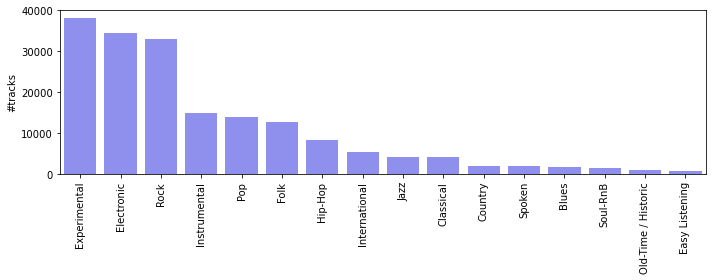

In [12]:
plt.figure(figsize=(10, 4))
p = sns.barplot('title', '#tracks', data=pgenres, color='b', alpha=0.5)
p.set_xlabel('')
plt.xticks(rotation=90)
plt.tight_layout()

Track counts by genres - most represented genres

In [13]:
genres.sort_values(by='#tracks',ascending=False).head(16)

#tracks  parent               title  top_level
genre_id                                                
38          38154       0        Experimental         38
15          34413       0          Electronic         15
12          32923       0                Rock         12
1235        14938       0        Instrumental       1235
10          13845       0                 Pop         10
17          12706       0                Folk         17
25           9261      12                Punk         12
1            8693      38         Avant-Garde         38
21           8389       0             Hip-Hop         21
32           7268      38               Noise         38
107          7206    1235             Ambient       1235
76           7144      10    Experimental Pop         10
41           6110      38     Electroacoustic         38
27           6041      12               Lo-Fi         12
18           5913    1235          Soundtrack       1235
42           5723      15  Ambient Electronic         15

Most represented genres by genre_top - this excludes **a lot** of tracks

In [14]:
df = tracks[[('track','genre_top')]]
counts = df.value_counts().head(10)
counts

(track, genre_top)
Rock                  14182
Experimental          10608
Electronic             9372
Hip-Hop                3552
Folk                   2803
Pop                    2332
Instrumental           2079
International          1389
Classical              1230
Jazz                    571
dtype: int64

#### Visualize # genres per track

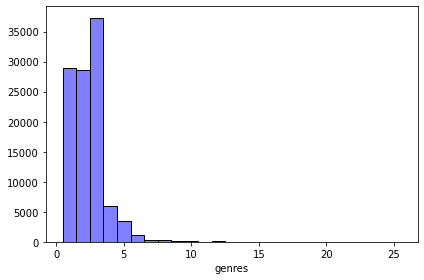

In [15]:
d = tracks[('track','genres')].str.count(',') + 1
#plt.figure(figsize=(10, 4))
p = sns.histplot(data=d, discrete=True, color='b', alpha=0.5)
p.set_xlabel('genres')
p.set_ylabel('')
plt.tight_layout()
plt.show()

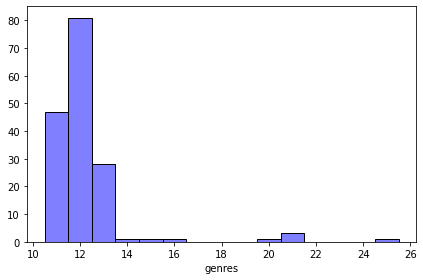

In [16]:
d = tracks[tracks[('track','genres')].str.count(',') > 9]
d = d[('track','genres')].str.count(',') + 1
#plt.figure(figsize=(10, 4))
p = sns.histplot(data=d, discrete=True, color='b', alpha=0.5)
p.set_xlabel('genres')
p.set_ylabel('')
plt.tight_layout()
plt.show()

#### Visualize genre hierarchies

genres appear weirdly imbalanced, flat, and somewhat arbitrary

* electronic has 14 children, pop has only 2
* international mostly classifies by country - is a song French or is it a French pop song?
* Hip-hop is a parent genre with 7 child genres, no deeper children

In [17]:
def genre_graph(genre_parent):
    genre_df = genres[genres['top_level'] == genre_parent]
    nodes = {}
    edges = []
    graph = pydot.Dot(graph_type='digraph', strict=True)
    for index, row  in genre_df.iterrows():
        title = row.title.replace(':',' -')
        node = pydot.Node(f'{title}({index})')
        nodes[index] = node
        edges.append((row.parent, index))

    for edge in edges:
        node_c = nodes[edge[1]]
        if edge[0] == 0:
            graph.add_node(node_c)
        else:
            node_p = nodes[edge[0]]   
            graph.add_edge(pydot.Edge(node_p, node_c))
    return graph

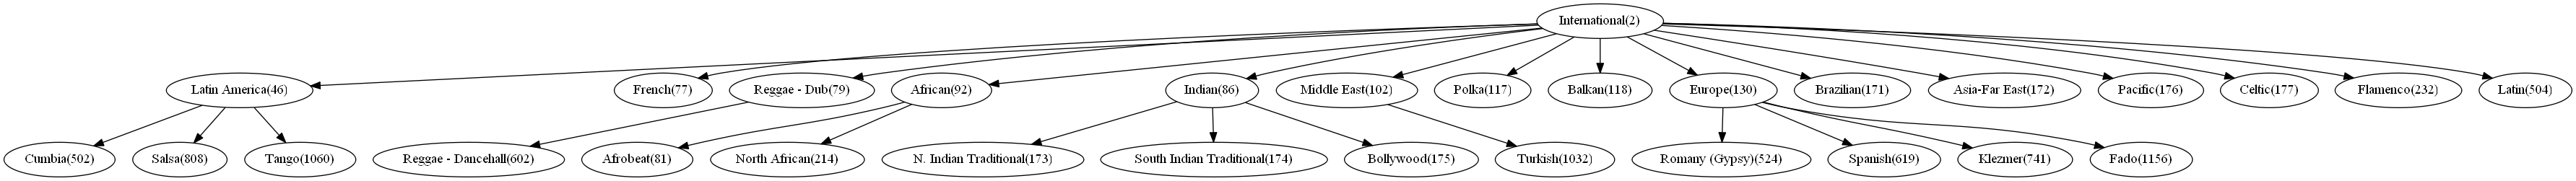

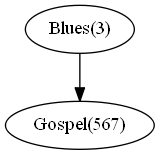

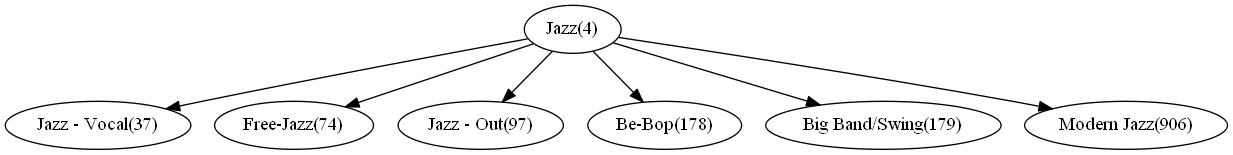

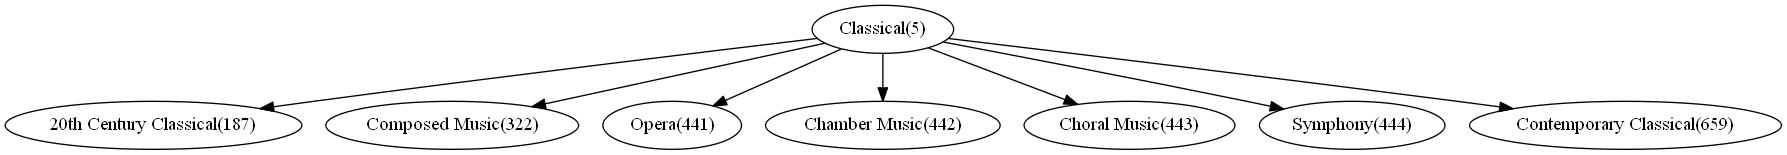

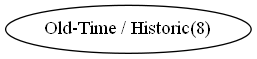

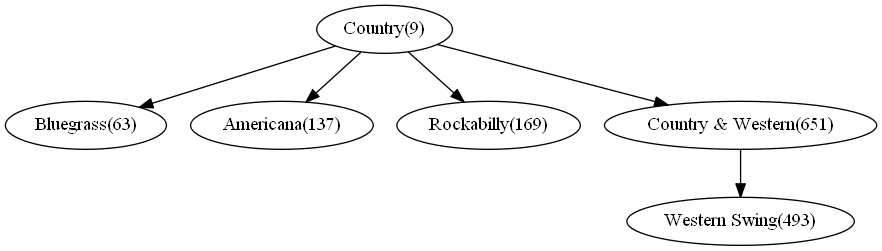

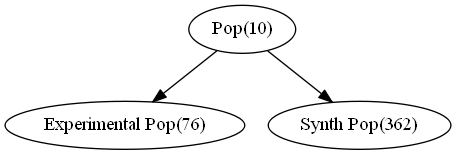

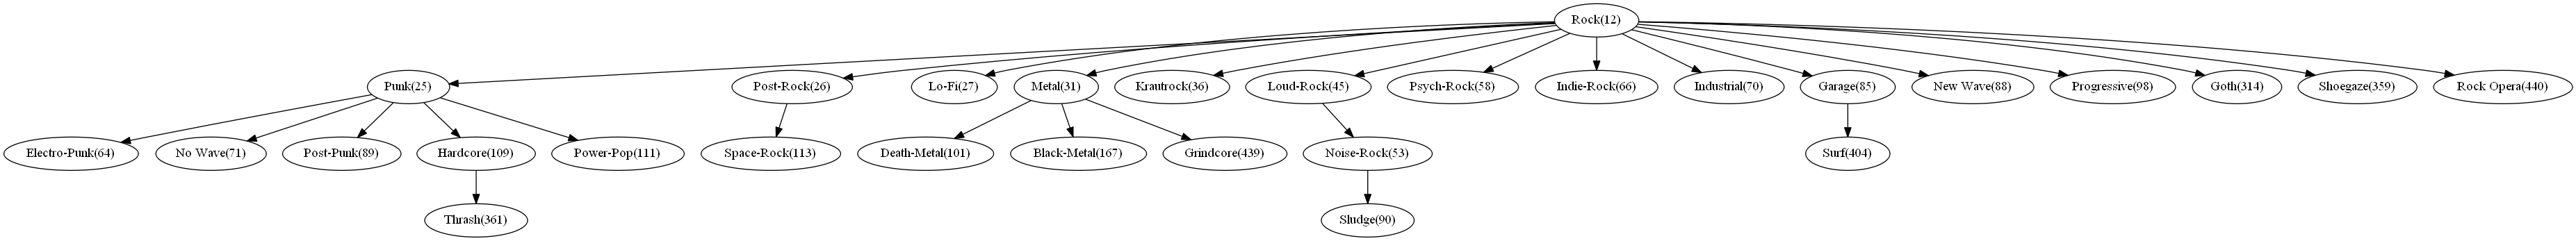

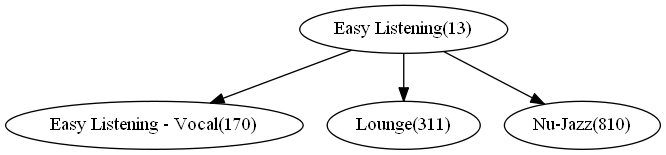

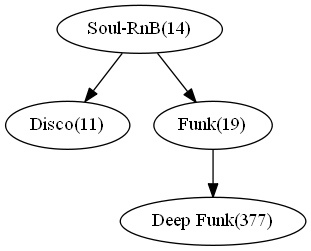

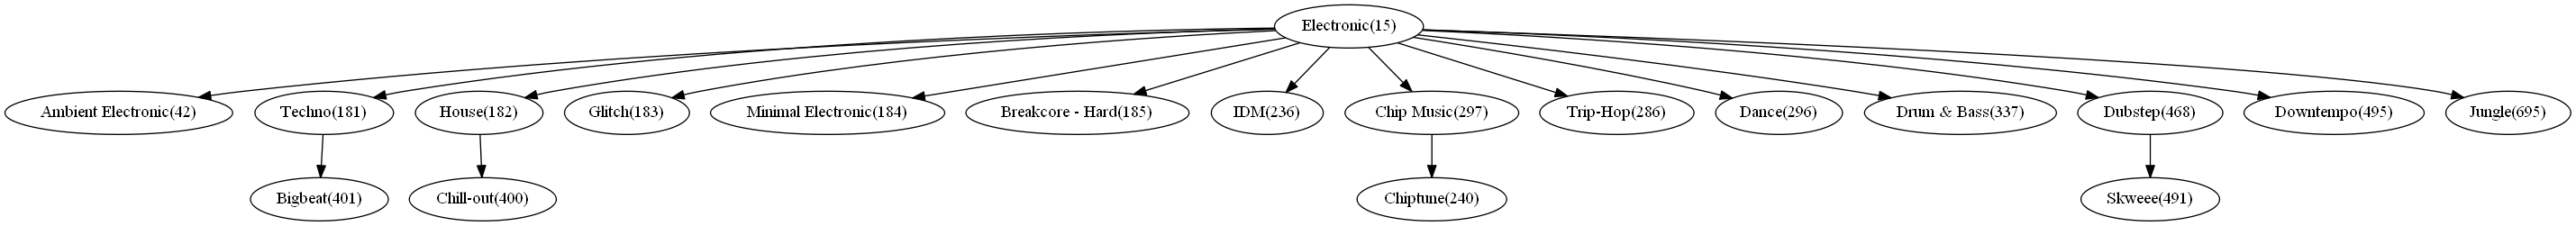

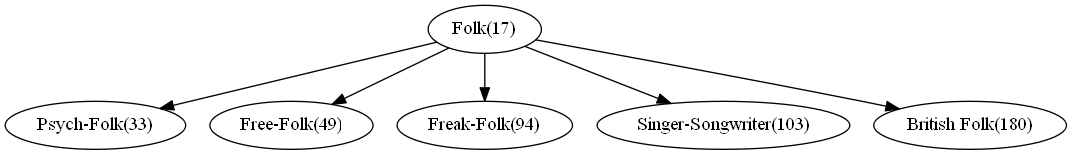

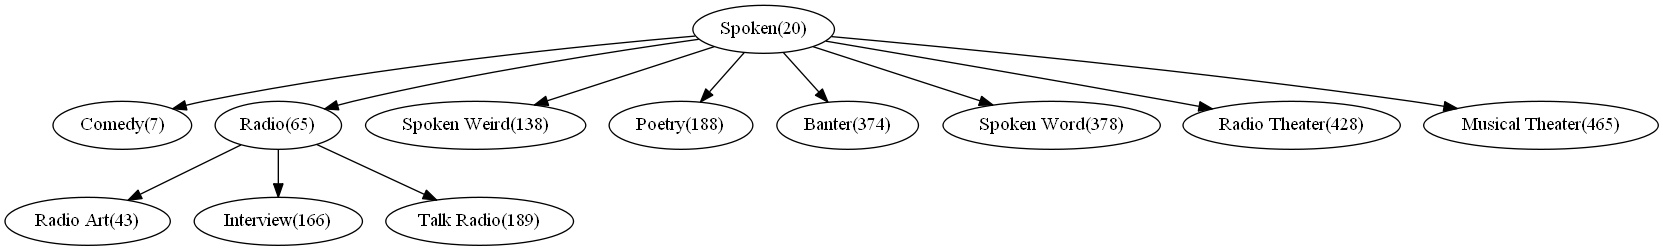

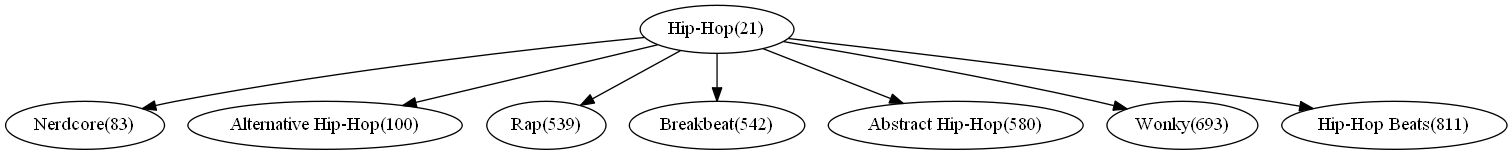

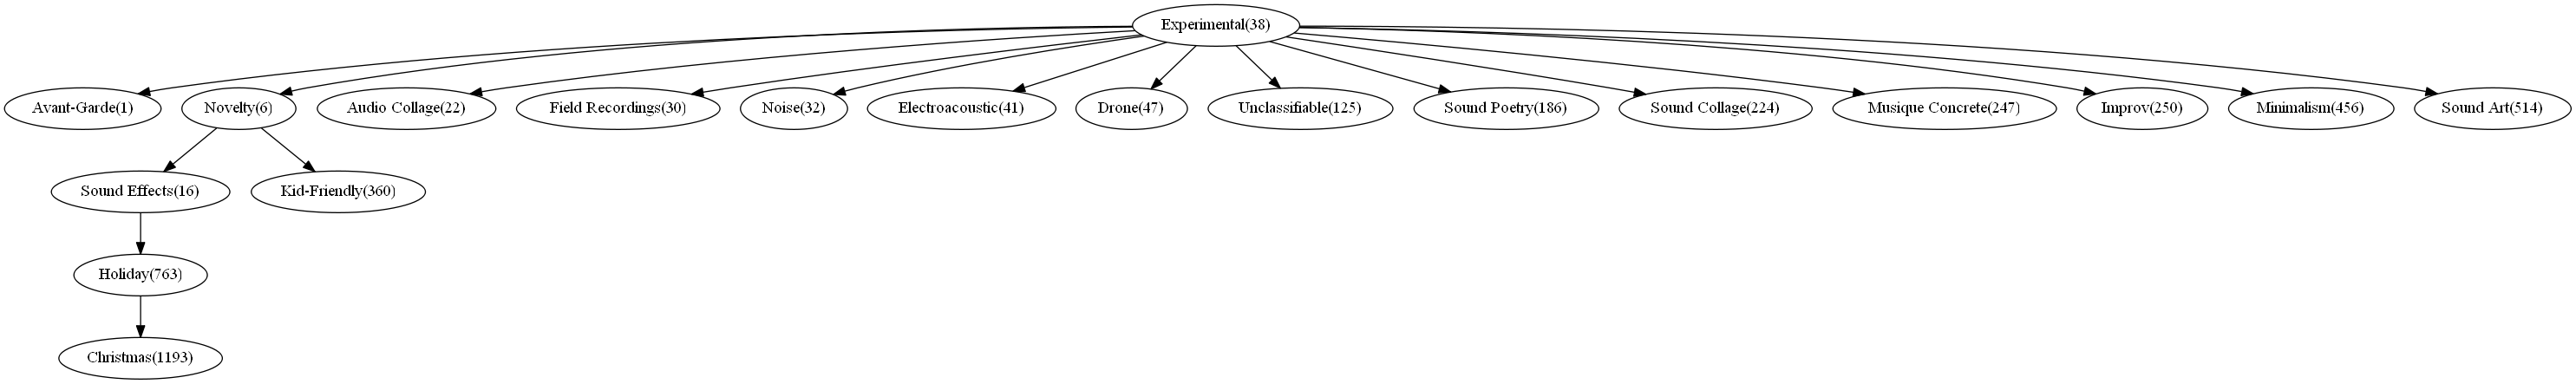

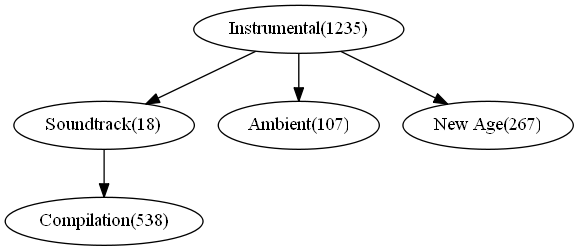

In [18]:
genre_top = genres[genres['parent'] == 0]
for gt_index, gt_row in genre_top.iterrows():
    graph = genre_graph(gt_index)
    ipd.display(ipd.Image(graph.create_png()))

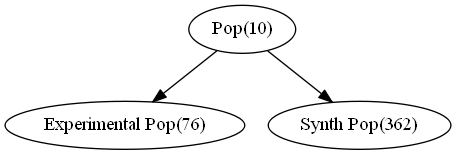

In [19]:
graph = genre_graph(10)
ipd.display(ipd.Image(graph.create_png()))

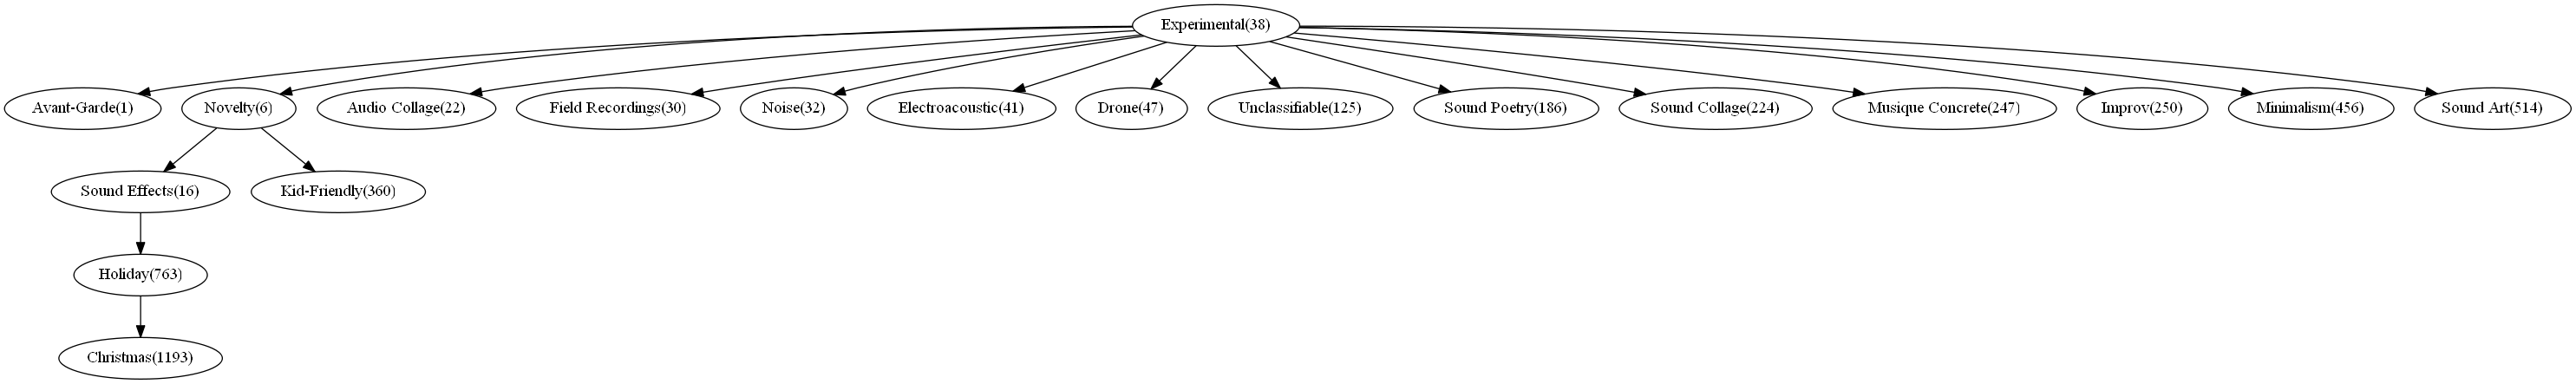

In [20]:
graph = genre_graph(38)
ipd.display(ipd.Image(graph.create_png()))

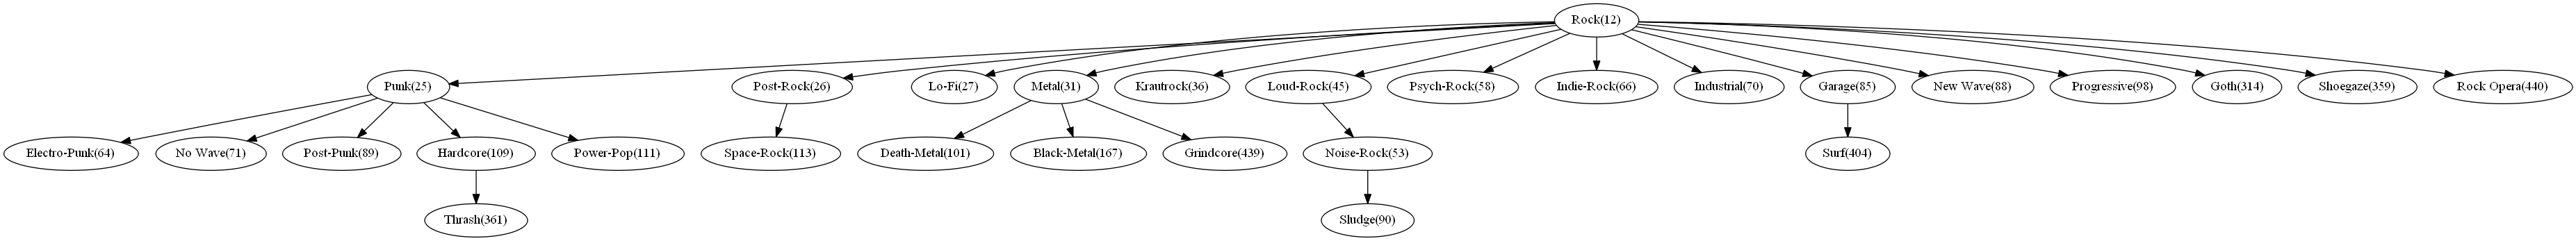

In [21]:
graph = genre_graph(12)
ipd.display(ipd.Image(graph.create_png()))

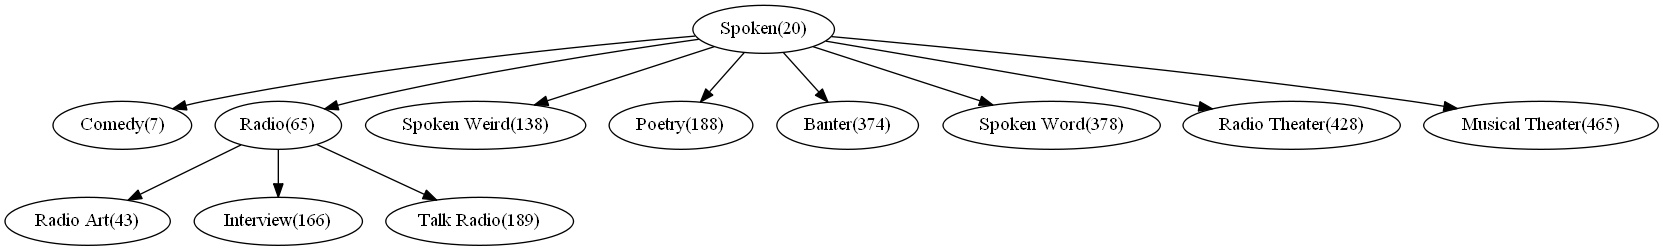

In [22]:
graph = genre_graph(20)
ipd.display(ipd.Image(graph.create_png()))

#### Examine correlation and distribution of some of the features

look at feature_01 means for all features

* not always normal
* some are highly correlated with each other - e.g. chroma_cens and chroma_cqt

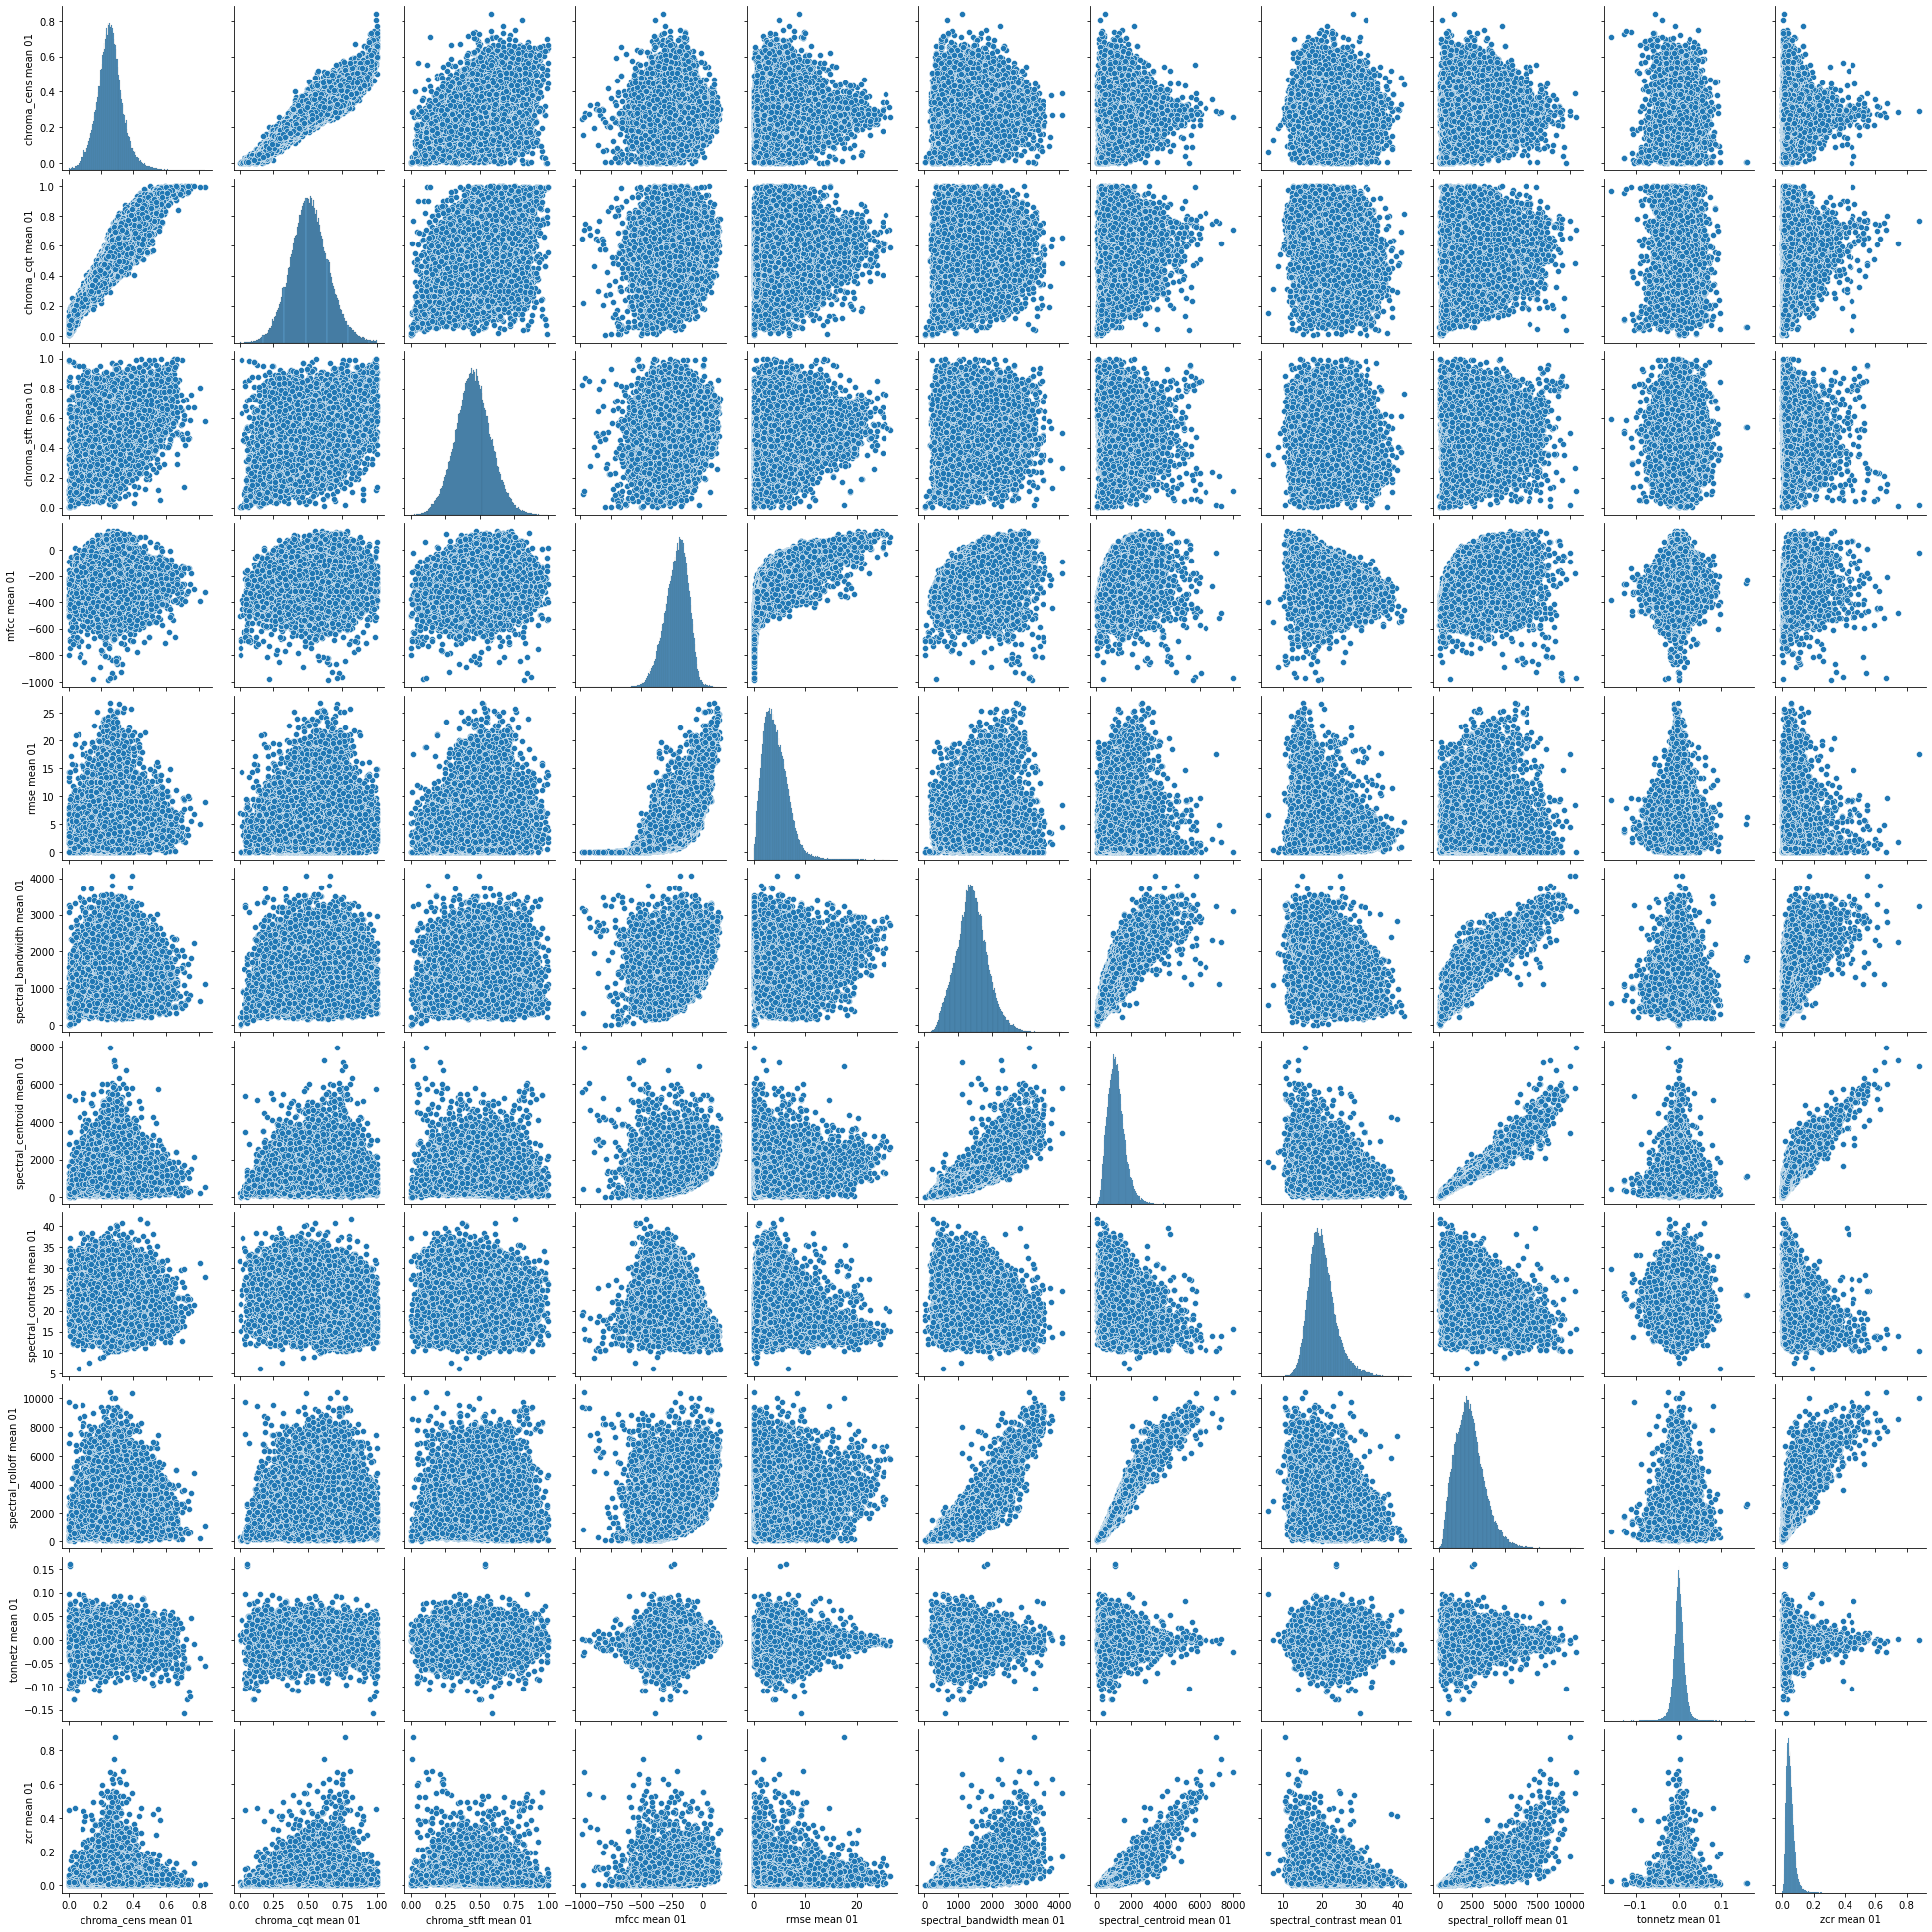

In [23]:
feature_means_01 = features.loc[:, (slice('chroma_cens','zcr'), 'mean', '01')].copy()

# flatten the column names to get pairplot() to work
feature_means_01.columns = [' '.join(col).strip() for col in feature_means_01.columns.values]
sns.pairplot(feature_means_01)
plt.show()

same approach for median_03 across all featuress

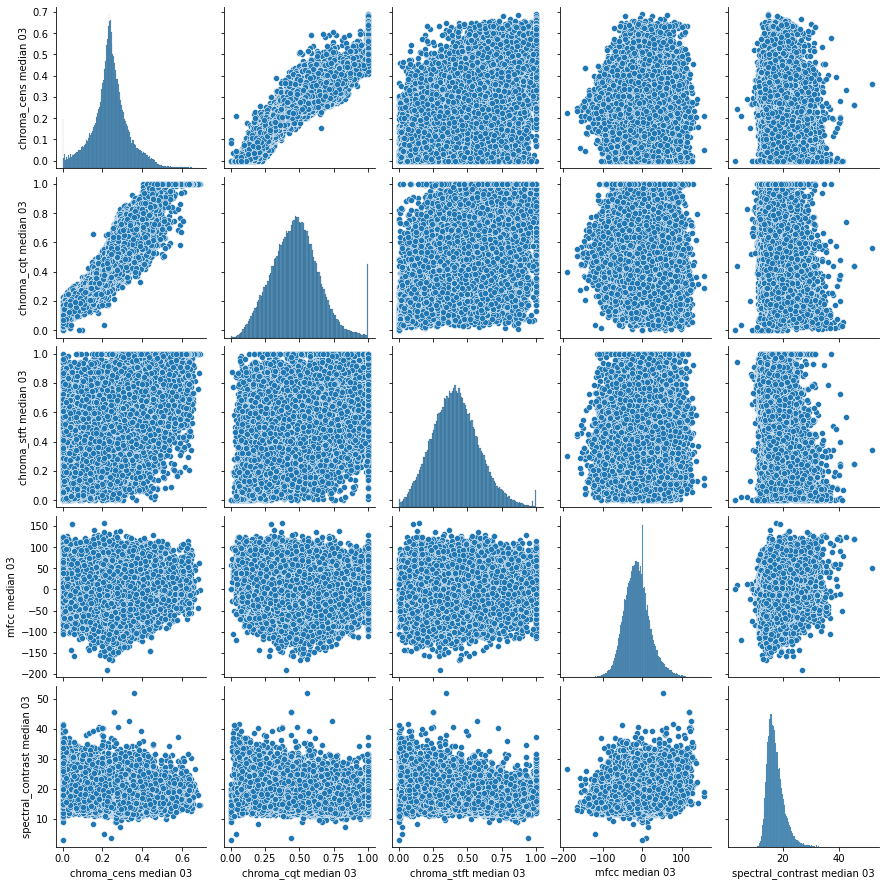

In [129]:
feature_median_03 = features.loc[:, (slice('chroma_cens','spectral_rolloff'), 'median', '03')].copy()

# flatten the column names to get pairplot() to work
feature_median_03.columns = [' '.join(col).strip() for col in feature_median_03.columns.values]
sns.pairplot(feature_median_03)
plt.show()

Examine spectral contrast mean across bins  - generally not tightly correlated

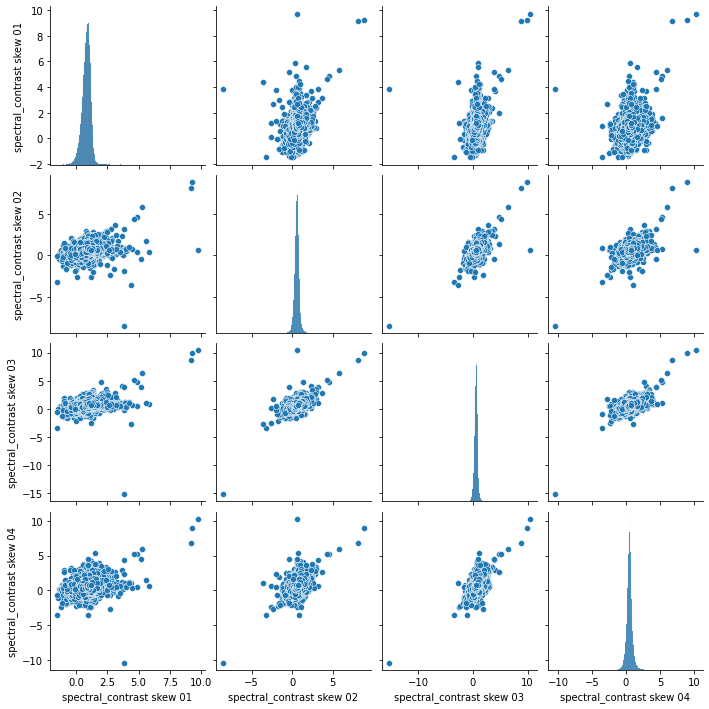

In [131]:
feature_sc = features.loc[:, ('spectral_contrast', 'skew', slice('01','04'))].copy()

# flatten the column names to get pairplot() to work
feature_sc.columns = [' '.join(col).strip() for col in feature_sc.columns.values]
sns.pairplot(feature_sc)
plt.show()

### Examine correlations

* print all features that are correlated > 0.95

In [32]:
correlations = features.corr()

In [122]:
corr_cols = {}
corr_pair_counts = {}

for i in range(correlations.shape[0]):
    for j in range(i+1, correlations.shape[0]):
        val = correlations.iat[i,j]
        if abs(val) > 0.90:
            r = correlations.index[i]
            c = correlations.columns[j]
            corr_cols[r] = True
            pair = f'{r[0]}_{r[1]}-{c[0]}_{c[1]}'
            corr_pair_counts[pair] = corr_pair_counts.get(pair, 0) + 1
            
print(len(corr_cols.keys()))
pd.Series(corr_pair_counts).sort_values(ascending=False).head(10)


99


mfcc_mean-mfcc_median                              20
chroma_cens_mean-chroma_cens_median                12
chroma_cqt_mean-chroma_cqt_median                  12
chroma_stft_mean-chroma_stft_median                12
chroma_stft_kurtosis-chroma_stft_kurtosis          10
chroma_cens_mean-chroma_cqt_mean                    9
chroma_cens_median-chroma_cqt_median                9
spectral_contrast_mean-spectral_contrast_median     7
chroma_cens_mean-chroma_cqt_median                  6
tonnetz_mean-tonnetz_median                         6
dtype: int64

<AxesSubplot:xlabel='feature-statistics-number', ylabel='feature-statistics-number'>

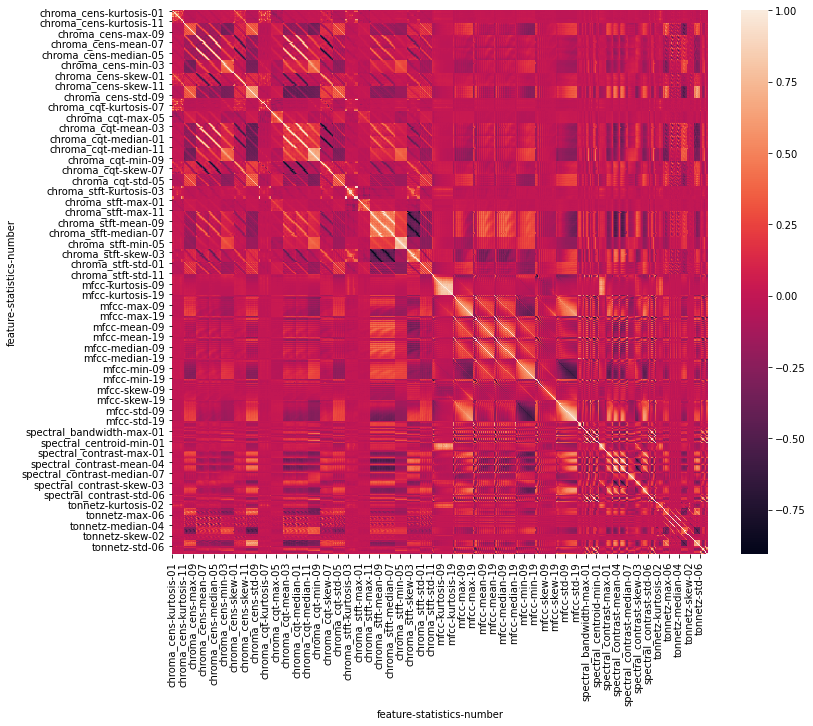

In [54]:
fig, axs = plt.subplots(figsize=(12,10))
sns.heatmap(correlations)

### Genre Breakdown - medium/small vs all tracks

In [ ]:
plt.figure(figsize=(10, 4))
p = sns.barplot('title', '#tracks', data=pgenres, color='b', alpha=0.5)
p.set_xlabel('')
plt.xticks(rotation=90)
plt.tight_layout()

In [61]:
small = tracks[('set', 'subset')] == 'small'
medium = tracks[('set', 'subset')].isin(['small','medium'])
y = tracks[medium][('track','genre_top')]
mg = y.value_counts()


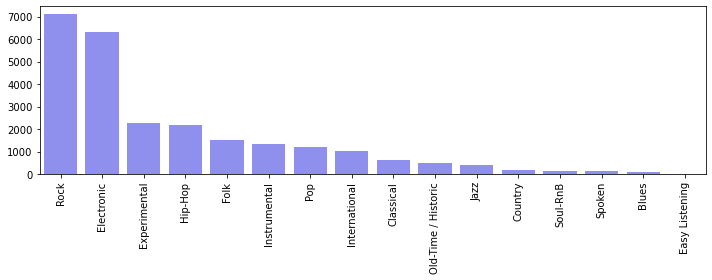

In [62]:

plt.figure(figsize=(10, 4))
p = sns.barplot(x=mg.index, y=mg.values,  color='b', alpha=0.5)
p.set_xlabel('')
plt.xticks(rotation=90)
plt.tight_layout()

In [64]:
all_genres = pgenres[['title', '#tracks']]

In [81]:
ag = all_genres.reset_index()
ag = ag.drop(columns='genre_id')
ag = ag.rename(columns= {'#tracks':'tracks'})
ag = ag.set_index(['title'])
ag = ag/ag.sum()
ag['set'] = 'full'
ag

tracks   set
title                              
Experimental         0.214852  full
Electronic           0.193785  full
Rock                 0.185395  full
Instrumental         0.084118  full
Pop                  0.077964  full
Folk                 0.071550  full
Hip-Hop              0.047240  full
International        0.029682  full
Jazz                 0.023234  full
Classical            0.023122  full
Country              0.011189  full
Spoken               0.010564  full
Blues                0.009866  full
Soul-RnB             0.008441  full
Old-Time / Historic  0.004888  full
Easy Listening       0.004111  full

In [123]:
medium = tracks[('set', 'subset')].isin(['small','medium'])
y = tracks[medium][('track','genre_top')]
mg = pd.DataFrame(data=y.value_counts())
mg.index.name='title'
mg.columns = ['tracks']
mg = mg/mg.sum()
mg['set'] = 'med'

small = tracks[('set', 'subset')].isin(['small'])
y = tracks[small][('track','genre_top')]
sg = pd.DataFrame(data=y.value_counts())
sg.index.name='title'
sg.columns = ['tracks']
sg = sg/sg.sum()
sg['set'] = 'small'





In [124]:
g = pd.concat([ag, mg, sg])
g.reset_index(inplace=True)


C:\Users\orovi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


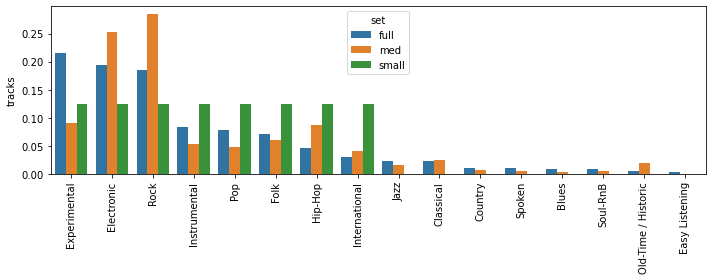

In [125]:
plt.figure(figsize=(10, 4))
p = sns.barplot('title', 'tracks', data=g, hue='set')
p.set_xlabel('')
plt.xticks(rotation=90)
plt.tight_layout()